In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
fname = "../data_generated/final_results.csv"
fname2 = "../data_generated/final_results_2.csv"
fname3 = "../data_generated/final_results_3.csv"
fname4 = "../data_generated/final_results_4.csv"
fname5 = "../data_generated/final_results_5.csv"
fname6 = "../data_generated/final_results_6.csv"
fname7 = "../data_generated/final_results_7.csv"
fname75 = "../data_generated/final_results_7_and_half.csv"
fname8 = "../data_generated/final_results_8.csv"
fname85 = "../data_generated/final_results_8_and_half.csv"
fname9 = "../data_generated/final_results_9.csv"
res_df_p1 = pd.read_csv(fname)
res_df_p2 = pd.read_csv(fname2)
res_df_p3 = pd.read_csv(fname3)
res_df_p4 = pd.read_csv(fname4)
res_df_p5 = pd.read_csv(fname5)
res_df_p6 = pd.read_csv(fname6)
res_df_p7 = pd.read_csv(fname7)
res_df_p75 = pd.read_csv(fname75)
res_df_p8 = pd.read_csv(fname8)
res_df_p85 = pd.read_csv(fname85)
res_df_p9 = pd.read_csv(fname9)
res_df = pd.concat((res_df_p1, res_df_p2, res_df_p3, res_df_p4, res_df_p5, res_df_p6,
                   res_df_p7, res_df_p75, res_df_p8, res_df_p85, res_df_p9), axis=0)

In [88]:
res_df = res_df.drop(["Unnamed: 0"], axis=1) # Artifact of saving/reloading into CSV
res_df.iloc[np.where(res_df.Weather_avg_h==-1)[0],res_df.columns.get_loc("Weather_avg_h")] = 0
res_df.iloc[np.where(res_df.History_days==-1)[0],res_df.columns.get_loc("History_days")] = 0

In [89]:
res_df

,Triage,Features,History_days,Weather_avg_h,Model,Parameters,NumTrgSamples,NumTestSamples,TrainAcc,TestAcc,Precision,Recall,F1,TP,TN,FP,FN,ImprOverMajTest,ImprOverMajTrain
0,pulse_Triage,History,3,0,1Dummy,Majority,2672,296,0.715970,0.715967,0.000000,0.000000,0.000000,0.0,212.5,0.0,84.3,0.000000,0.000000
1,pulse_Triage,History,3,0,1Dummy,Stratified,2672,296,0.546982,0.565704,0.286559,0.264892,0.274755,22.4,156.5,56.0,61.9,-0.150263,-0.168988
2,pulse_Triage,History,3,0,DT,10-None,2672,296,0.753968,0.737191,0.696679,0.247286,0.363713,20.8,203.5,9.0,63.5,0.021223,0.037998
3,pulse_Triage,History,3,0,DT,10-auto,2672,296,0.753968,0.737191,0.696679,0.247286,0.363713,20.8,203.5,9.0,63.5,0.021223,0.037998
4,pulse_Triage,History,3,0,DT,10-log2,2672,296,0.753968,0.737191,0.696679,0.247286,0.363713,20.8,203.5,9.0,63.5,0.021223,0.037998
5,pulse_Triage,History,3,0,DT,20-None,2672,296,0.753968,0.737191,0.696679,0.247286,0.363713,20.8,203.5,9.0,63.5,0.021223,0.037998
6,pulse_Triage,History,3,0,DT,20-auto,2672,296,0.753968,0.737527,0.698829,0.247286,0.364003,20.8,203.6,8.9,63.5,0.021560,0.037998
7,pulse_Triage,History,3,0,DT,20-log2,2672,296,0.753968,0.737527,0.698829,0.247286,0.364003,20.8,203.6,8.9,63.5,0.021560,0.037998
8,pulse_Triage,History,3,0,DT,5-None,2672,296,0.749438,0.739550,0.694838,0.236123,0.350677,19.9,203.8,8.7,64.4,0.023583,0.033468
9,pulse_Triage,History,3,0,DT,5-auto,2672,296,0.746443,0.739548,0.723409,0.207211,0.321000,17.6,205.9,6.6,66.7,0.023580,0.030473


In [90]:
res_df.History_days.unique()

array([ 3,  4,  5,  6,  0,  1,  2,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

Here we need to compare several parameter sets:
- Weather only
- History only
- History + weather

Within those options we need to check the dependency between history length (both for weather and triages) and accuracy/f1.

In [91]:
triages = {
  "Pulse" : res_df[res_df.Triage=='pulse_Triage'],
  "Question" : res_df[res_df.Triage=='question_Triage'],
  "SPO2" : res_df[res_df.Triage=='spo2_Triage'],
  "Manual" : res_df[res_df.Triage=='manual_Triage'],
}

In [92]:
triages["Pulse"].History_days.unique()

array([ 3,  4,  5,  6,  0,  1,  2,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [93]:
human_readable_model_name = {
    '1Dummy' : "Random guess predictor",
    'DT' : "Decision trees",
    'GBT': "Gradient boosted trees",
    'LR' : "Logistic regression",
    'RF' : "Random forests"}

# Not recommeded. We have 4 line types and more than 4 models
linestyles_by_model = {
    '1Dummy' : ':',
    'DT' : "--",
    'GBT': "-.",
    'LR' : ":",
    'RF' : "-"}

In [94]:
readable_parameter_names = {
    "F1" : "F1 score",
    "TestAcc" : "Test set accuracy",
    "Precision": "Precision",
    "Recall": "Recall",
    "TP": "True positive",
    "FP": "False positive",
    "TN": "True negative",
    "FN": "False negative",
    "TrainAcc" : "Training set accuracy",
}

In [95]:
for cur_triage_name in ["Pulse"]:
    cur_triage_df = triages[cur_triage_name]
    cur_triage_df.groupby("History_days").max()

In [96]:
cur_triage_history_only = cur_triage_df[cur_triage_df.Features=="History"]
cur_triage_weather_only = cur_triage_df[cur_triage_df.Features=="Weather"]
cur_triage_history_and_weather = cur_triage_df[cur_triage_df.Features=="Weather & History"]
print(cur_triage_history_only.groupby("History_days").max()[["TestAcc","Precision","Recall","F1"]],"\n\n",
      cur_triage_history_and_weather.groupby("History_days").max()[["TestAcc","Precision","Recall","F1"]],"\n\n",
      cur_triage_weather_only.groupby("History_days").max()[["TestAcc","Precision","Recall","F1"]])

               TestAcc  Precision    Recall        F1
History_days                                         
1             0.723048   0.610631  0.283374  0.385556
2             0.739550   0.771089  0.264892  0.370580
3             0.746959   0.778055  0.278350  0.395703
4             0.747971   0.811894  0.316349  0.421239
5             0.748980   0.849444  0.332028  0.420870
6             0.748645   0.862576  0.367259  0.438815
7             0.749660   0.857619  0.388989  0.452648
8             0.747637   0.886004  0.403595  0.458132
9             0.748648   0.845949  0.407701  0.452044
10            0.749658   0.870833  0.424704  0.469029
11            0.748649   0.877172  0.434614  0.456360
12            0.751673   0.883045  0.415841  0.444038
13            0.749322   0.905556  0.428531  0.465308
14            0.753693   0.901807  0.453625  0.460483
15            0.754373   0.886389  0.476979  0.460729
16            0.753697   0.886389  0.449401  0.450511
17            0.754713   0.8

In [97]:
print(cur_triage_weather_only.groupby("Weather_avg_h").max()[["TestAcc","Precision","Recall","F1"]],"\n\n",
      cur_triage_weather_only.groupby("Weather_avg_h").max()[["TestAcc","Precision","Recall","F1"]],"\n\n")


                TestAcc  Precision    Recall        F1
Weather_avg_h                                         
0              0.715967   0.468452  0.264892  0.274755
4              0.717654   0.591667  0.264892  0.282808
8              0.716978   0.519368  0.264892  0.275543
12             0.716978   0.513333  0.264892  0.274755
16             0.716306   0.618333  0.264892  0.274755
20             0.716979   0.641905  0.264892  0.274755
24             0.716643   0.550000  0.264892  0.274755
28             0.716643   0.600000  0.264892  0.281013
32             0.716643   0.466667  0.264892  0.274755
36             0.716979   0.556667  0.264892  0.274755
40             0.716306   0.436071  0.264892  0.274755
44             0.716642   0.483571  0.264892  0.274755
48             0.716306   0.456667  0.264892  0.274755 

                 TestAcc  Precision    Recall        F1
Weather_avg_h                                         
0              0.715967   0.468452  0.264892  0.274755
4      

In [98]:
best_f1_idx_hist_only = cur_triage_history_only.groupby("History_days").idxmax()["F1"]
cur_triage_history_only.loc[best_f1_idx_hist_only,:]

,Triage,Features,History_days,Weather_avg_h,Model,Parameters,NumTrgSamples,NumTestSamples,TrainAcc,TestAcc,Precision,Recall,F1,TP,TN,FP,FN,ImprOverMajTest,ImprOverMajTrain
2,pulse_Triage,History,3,0,DT,10-None,2672,296,0.753968,0.737191,0.696679,0.247286,0.363713,20.8,203.5,9.0,63.5,0.021223,0.037998
2,pulse_Triage,History,1,0,DT,10-None,2672,296,0.723046,0.723048,0.610631,0.283374,0.385556,23.8,197.1,15.4,60.5,0.007081,0.007076
2,pulse_Triage,History,2,0,DT,10-None,2672,296,0.740266,0.738203,0.705580,0.236091,0.352967,19.9,204.1,8.4,64.4,0.022236,0.024296
2,pulse_Triage,History,7,0,DT,10-None,2672,296,0.838612,0.717994,0.627667,0.331234,0.432620,27.9,196.0,16.5,56.4,0.002027,0.122642
2,pulse_Triage,History,1,0,DT,10-None,2672,296,0.723046,0.723048,0.610631,0.283374,0.385556,23.8,197.1,15.4,60.5,0.007081,0.007076
2,pulse_Triage,History,1,0,DT,10-None,2672,296,0.723046,0.723048,0.610631,0.283374,0.385556,23.8,197.1,15.4,60.5,0.007081,0.007076
2,pulse_Triage,History,1,0,DT,10-None,2672,296,0.723046,0.723048,0.610631,0.283374,0.385556,23.8,197.1,15.4,60.5,0.007081,0.007076
2,pulse_Triage,History,16,0,DT,10-None,2672,296,0.869684,0.704520,0.570093,0.358372,0.435685,30.1,189.5,23.0,54.2,-0.011447,0.153714
2,pulse_Triage,History,16,0,DT,10-None,2672,296,0.869684,0.704520,0.570093,0.358372,0.435685,30.1,189.5,23.0,54.2,-0.011447,0.153714
2,pulse_Triage,History,11,0,DT,10-None,2672,296,0.858940,0.704516,0.567035,0.358363,0.435559,30.0,189.6,22.9,54.3,-0.011451,0.142970


In [99]:
cur_triage_history_and_weather.groupby(["History_days","Weather_avg_h"]).max()["F1"]

History_days  Weather_avg_h
1             0                0.361757
              4                0.351668
              8                0.349900
              12               0.365119
              16               0.349693
              20               0.367344
              24               0.362866
              28               0.358219
              32               0.346680
              36               0.364276
              40               0.349400
              44               0.360366
              48               0.360085
2             0                0.383834
              4                0.380158
              8                0.372741
              12               0.381405
              16               0.392647
              20               0.373557
              24               0.388529
              28               0.381216
              32               0.384014
              36               0.374646
              40               0.370372
            

In [100]:
all_hist_days = sorted(res_df.History_days.unique())
all_hours = sorted(res_df.Weather_avg_h.unique())

for d in all_hist_days:
    for h in all_hours:
        count_vals = np.sum((res_df.History_days==d)&(res_df.Weather_avg_h==h))
        if count_vals==0:
            print("Missing: ", d, h)

In [101]:
# 12-15: no 0-12h

In [102]:
# Load train set and test set
all_data = pd.read_csv("../data_generated/Patients_and_Weather_extended.csv")
all_data['Assess_Date_With_Time'] = pd.to_datetime(all_data['Assess_Date_With_Time'], format='%Y-%m-%d %H:%M:%S')
all_data['Assess_date_No_Time'] = all_data['Assess_Date_With_Time'].dt.date

all_ids = all_data['Merida ID'].unique()
np.random.seed(0)
selected_ids = np.random.choice(all_ids, size = int(len(all_ids)*0.9))

train_data = all_data[[i in selected_ids for i in all_data['Merida ID']]]
test_data = all_data[[i not in selected_ids for i in all_data['Merida ID']]]

selected_ids

array([1011793, 1012234, 1015316, 1015520, 1015520, 9900011, 1002016,
       1016543, 1006786, 1010801, 1017075, 1015622, 1017096, 1017096,
       1003559, 1014090, 1015384, 9900009, 1010994, 1017075, 1012135,
       1017096, 1016405, 1010802, 1007521, 1015804, 1015624, 1002016,
       1006655, 1016300, 1015587, 1016140, 1012234, 1015316, 1016533,
       9900004, 1017096, 1012274, 1008256, 1005943, 1005943, 1004568,
       1010994, 1008779, 1015384, 1002016, 1014084, 1008779, 1008340,
       1015680, 1006921, 1010693, 1015735, 1013896, 1008255, 1010322,
       1000405, 1000405, 1010801, 1012492, 1001191, 1010982, 9900123,
       1005247, 1016140, 1000763, 9900124, 1011651, 1014090, 1008340,
       1000559, 1015384, 9900011, 1011631, 1014084, 1010693, 9900009,
       1003095, 1012135, 1016533, 1017437, 1000405, 1004568, 9900004,
       1012492, 1003559, 1011651, 1016708, 1015735, 1015538, 1001534,
       1015538, 1012234, 1000609, 1015751, 9900006, 1012458, 9900123])

In [103]:
fname1 = "../data_generated/final_results_test_set.csv"
fname2 = "../data_generated/final_results_test_set_2.csv"
fname3 = "../data_generated/final_results_test_set_3.csv"
fname4 = "../data_generated/final_results_test_set_4.csv"
res_test_df_p1 = pd.read_csv(fname1)
res_test_df_p2 = pd.read_csv(fname2)
res_test_df_p3 = pd.read_csv(fname3)
res_test_df_p4 = pd.read_csv(fname4)
res_test_df = pd.concat((res_test_df_p1, res_test_df_p2, res_test_df_p3, res_test_df_p4), axis=0)

test_triages = {
  "Pulse" : res_test_df[res_test_df.Triage=='pulse_Triage'],
  "Question" : res_test_df[res_test_df.Triage=='question_Triage'],
  "SPO2" : res_test_df[res_test_df.Triage=='spo2_Triage'],
  "Manual" : res_test_df[res_test_df.Triage=='manual_Triage'],
}

res_test_df

,Unnamed: 0,Triage,Features,History_days,Weather_avg_h,Model,Parameters,NumTrgSamples,NumTestSamples,TrainAcc,TestAcc,Precision,Recall,F1,TP,TN,FP,FN,ImprOverMajTest,ImprOverMajTrain
0,0,pulse_Triage,History,1,-1,1Dummy,Majority,2968,2094,0.715970,0.706304,0.000000,0.000000,0.000000,0.0,1479.0,0.0,615.0,0.000000,0.000000
1,1,pulse_Triage,History,1,-1,1Dummy,Stratified,2968,2094,0.547507,0.560172,0.332790,0.331707,0.332248,204.0,1070.0,409.0,411.0,-0.146132,-0.168464
2,2,pulse_Triage,History,1,-1,DT,10-None,2968,2094,0.723046,0.706304,0.582555,0.304065,0.399573,187.0,1345.0,134.0,428.0,0.000000,0.007075
3,3,pulse_Triage,History,1,-1,DT,10-auto,2968,2094,0.723046,0.706304,0.582555,0.304065,0.399573,187.0,1345.0,134.0,428.0,0.000000,0.007075
4,4,pulse_Triage,History,1,-1,DT,10-log2,2968,2094,0.723046,0.706304,0.582555,0.304065,0.399573,187.0,1345.0,134.0,428.0,0.000000,0.007075
5,5,pulse_Triage,History,1,-1,DT,20-None,2968,2094,0.723046,0.706304,0.582555,0.304065,0.399573,187.0,1345.0,134.0,428.0,0.000000,0.007075
6,6,pulse_Triage,History,1,-1,DT,20-auto,2968,2094,0.723046,0.706304,0.582555,0.304065,0.399573,187.0,1345.0,134.0,428.0,0.000000,0.007075
7,7,pulse_Triage,History,1,-1,DT,20-log2,2968,2094,0.723046,0.706304,0.582555,0.304065,0.399573,187.0,1345.0,134.0,428.0,0.000000,0.007075
8,8,pulse_Triage,History,1,-1,DT,5-None,2968,2094,0.723046,0.706304,0.582555,0.304065,0.399573,187.0,1345.0,134.0,428.0,0.000000,0.007075
9,9,pulse_Triage,History,1,-1,DT,5-auto,2968,2094,0.723046,0.706304,0.582555,0.304065,0.399573,187.0,1345.0,134.0,428.0,0.000000,0.007075


In [104]:
from sklearn import tree, ensemble, dummy, linear_model

feature_set_types = ("History", "Weather & History", ) # Weather - not needed
interesting_columns_weather = ['temp', 'pressure','humidity']

best_models_test = dict()

log_res = False

for parameter in readable_parameter_names:
    best_models_test[parameter] = dict()
    for t in triages:
        best_models_test[parameter][t] = dict()
        cur_triage_df = triages[t][triages[t]["Model"] != "1Dummy"].reset_index()
        cur_triage_history_only = cur_triage_df[cur_triage_df.Features=="History"]
        # cur_triage_weather_only = cur_triage_df[cur_triage_df.Features=="Weather"]
        cur_triage_history_and_weather = cur_triage_df[cur_triage_df.Features=="Weather & History"]    

        largest_par_models_hw = cur_triage_history_and_weather.groupby(["History_days"]).idxmax()[parameter]
        largest_par_models_h = cur_triage_history_only.groupby(["History_days"]).idxmax()[parameter]

        models_hw = cur_triage_history_and_weather.loc[largest_par_models_hw][["History_days",
                                                        "Weather_avg_h","Model","Parameters",parameter]]
        models_h = cur_triage_history_only.loc[largest_par_models_h][["History_days","Model","Parameters",parameter]]
        if log_res:
            print("============",t,"============")
            print("=== History & Weather ===")
            print(models_hw)
            print("=== History Only ===")
            print(models_h)
            #print(cur_triage_history_and_weather.groupby(["History_days","Weather_avg_h"]).max()["F1"])    

        x_test_set = list()
        y_test_set_h = list()
        y_test_set_hw = list()
        models_h_listed = list()
        models_hw_listed = list()
        models_parameters_h_listed = list()
        models_parameters_hw_listed = list()
        weather_hours = list()
        for h in sorted(cur_triage_history_only["History_days"].unique()):
            res_df_h = models_h[models_h["History_days"]==h].iloc[0,:]
            main_model_h = res_df_h["Model"]
            model_pars_h = res_df_h["Parameters"]
            res_df_hw = models_hw[models_hw["History_days"]==h].iloc[0,:]
            main_model_hw = res_df_hw["Model"]
            model_pars_hw = res_df_hw["Parameters"]
            weather_avg_hw = res_df_hw["Weather_avg_h"]
            #print(h,main_model_h, model_pars_h, main_model_hw, model_pars_hw)        

            test_results_h = test_triages[t][
                (test_triages[t].Features == 'History') &
                (test_triages[t].History_days == h) &
                (test_triages[t].Model == main_model_h) &
                (test_triages[t].Parameters == model_pars_h)
            ]

            test_results_hw = test_triages[t][
                (test_triages[t].Features == 'Weather & History') &
                (test_triages[t].History_days == h) &
                (test_triages[t].Weather_avg_h == weather_avg_hw) &
                (test_triages[t].Model == main_model_hw) &
                (test_triages[t].Parameters == model_pars_hw)
            ]

            if (len(test_results_h)>0 and len(test_results_hw)>0):
                x_test_set.append(h)
                weather_hours.append(weather_avg_hw)            
                y_test_set_h.append(float(np.mean(test_results_h[parameter])))
                y_test_set_hw.append(float(np.mean(test_results_hw[parameter])))
                models_h_listed.append(main_model_h)
                models_hw_listed.append(main_model_hw)
                models_parameters_h_listed.append(model_pars_h)
                models_parameters_hw_listed.append(model_pars_hw)
            else:
                print("WARNING! Problematic H or HW data for parameters", parameter, t, h,
                             len(test_results_h),len(test_results_hw))
                # Lower lines are no longer relevant
                if (np.min(test_results_h[parameter])==np.max(test_results_h[parameter])) and \
                   (np.min(test_results_hw[parameter])==np.max(test_results_hw[parameter])):
                    msg = "We are fine"
                else:
                    msg = "We are NOT fine"
                print(msg, list(test_results_h[parameter]) , list(test_results_hw[parameter]))
            
        best_models_test[parameter][t]["weather_hours"] = weather_hours
        best_models_test[parameter][t]["X_test"] = x_test_set
        best_models_test[parameter][t]["Y_test_h"] = y_test_set_h
        best_models_test[parameter][t]["Y_test_hw"] = y_test_set_hw
        best_models_test[parameter][t]["Models_h"] = models_h_listed
        best_models_test[parameter][t]["Model_pars_h"] = models_parameters_h_listed
        best_models_test[parameter][t]["Models_hw"] = models_hw_listed
        best_models_test[parameter][t]["Model_pars_hw"] = models_parameters_hw_listed
            
            #cur_training_X = train_data[training_columns]
            #cur_training_Y = train_data[t]

        if log_res:
            print("=============================\n\n")

In [105]:
best_models_test['F1']['Pulse']

{'weather_hours': [20,
  16,
  4,
  24,
  36,
  8,
  0,
  32,
  0,
  32,
  0,
  32,
  0,
  36,
  0,
  0,
  0,
  0,
  0,
  0],
 'X_test': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20],
 'Y_test_h': [0.3995726495726496,
  0.33971291866028713,
  0.3702830188679246,
  0.4384133611691024,
  0.38032786885245895,
  0.3835005574136009,
  0.42084562438544737,
  0.4409302325581396,
  0.4539767649687221,
  0.4179104477611941,
  0.4554280670785524,
  0.4270152505446623,
  0.4262990455991516,
  0.4276595744680852,
  0.4378947368421053,
  0.4726368159203981,
  0.42668863261943984,
  0.4413680781758957,
  0.4610336341263329,
  0.44992050874403816],
 'Y_test_hw': [0.3642384105960265,
  0.3956228956228957,
  0.4059900166389352,
  0.4337552742616034,
  0.4062745098039216,
  0.39462636439966414,
  0.4335126825518831,
  0.4254633360193392,
  0.4299732381801962,
  0.42053789731051344,
  0.4448025785656729,
  0.4728434504792332,
  0.43759873617

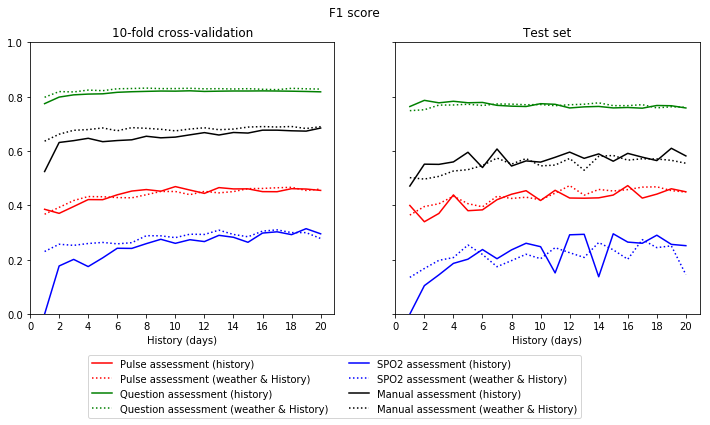

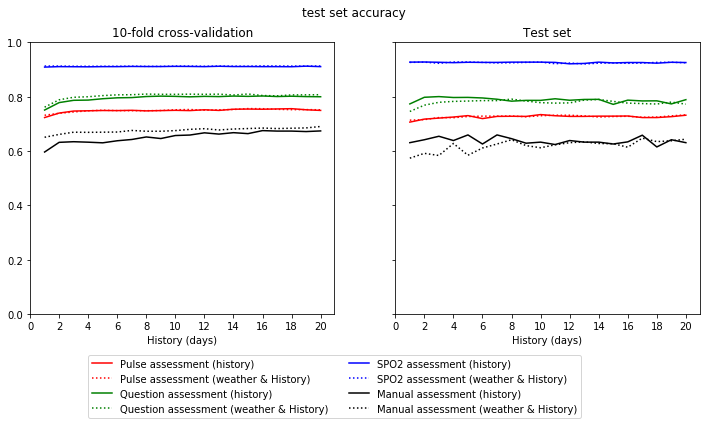

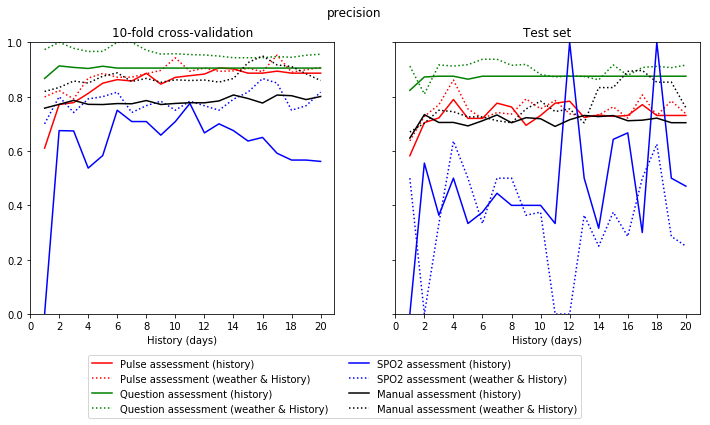

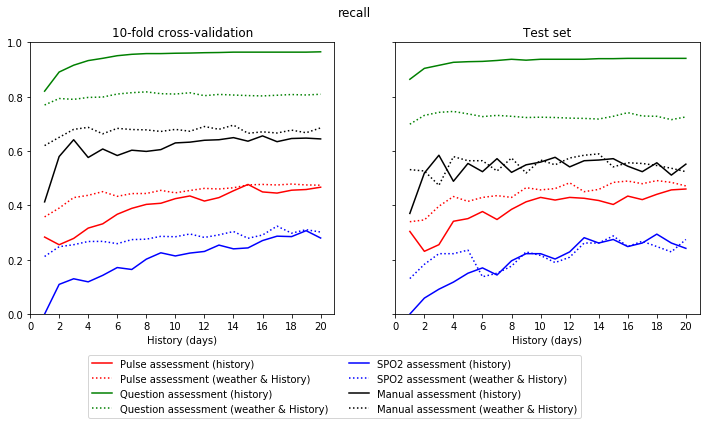

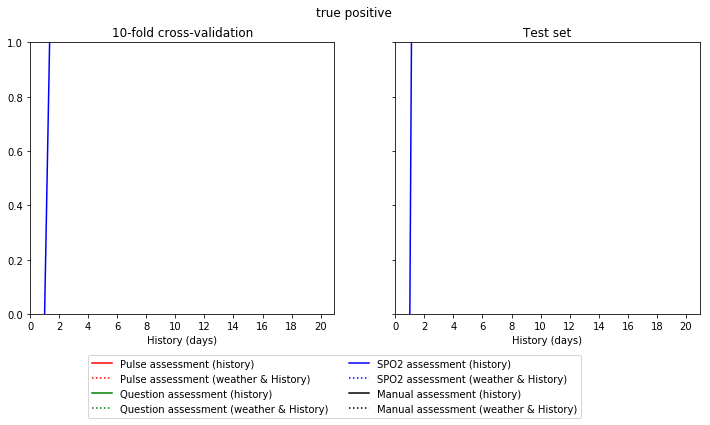

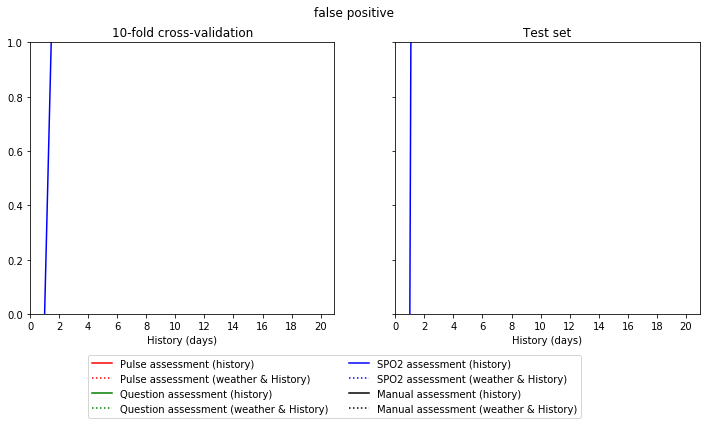

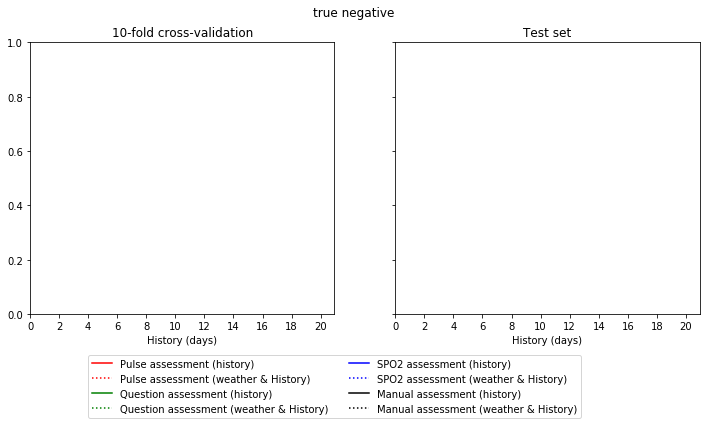

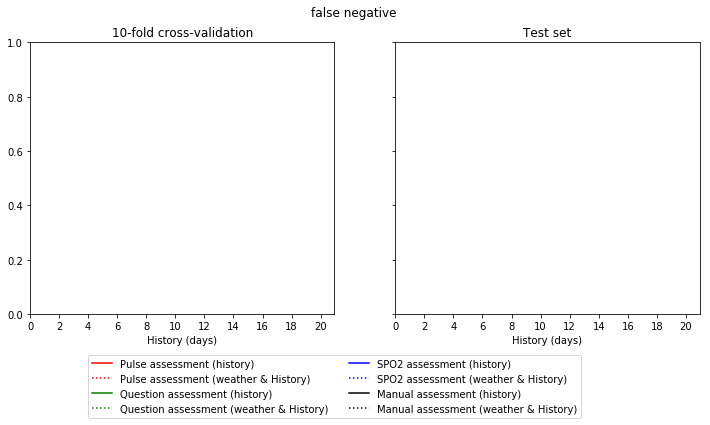

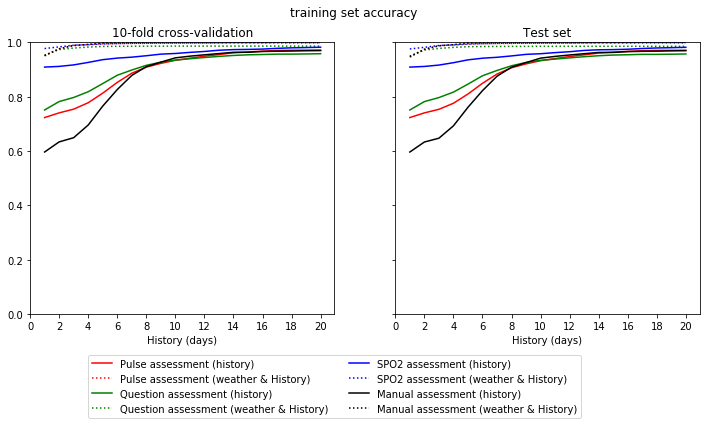

In [120]:
linestyles_by_mode = {"History": '-', "Weather & History": ':'}
test_y_names_by_mode = {"History": 'Y_test_h', "Weather & History": 'Y_test_hw'}
colors_by_triage = {
  "Pulse" : 'red',
  "Question" : 'green',
  "SPO2" : 'blue',
  "Manual" : 'black',
}

best_models_by_par = dict()
for parameter in readable_parameter_names: 
    f, ax = plt.subplots(1,2, sharey=True)
    f.set_size_inches(12,5)
    legend_list = list()
    best_models = dict()
      
    for t in triages:
        cur_triage_df = triages[t][triages[t]["Model"] != "1Dummy"]
        all_hist_days = sorted(cur_triage_df["History_days"].unique())
               
        df_by_modes = dict()
        for m in linestyles_by_mode:
            df_by_modes[m] = cur_triage_df[cur_triage_df.Features==m]
            df_by_modes[m] = pd.DataFrame(df_by_modes[m].groupby(["History_days"]).max()[parameter]).reset_index()
        
            legend_list.append(t+" assessment ("+m[0:1].lower()+m[1:]+")")
            x = list()
            y = list()
            for h in all_hist_days:
                y_par = list(df_by_modes[m][df_by_modes[m]["History_days"]==h][parameter])
                if len(y_par) > 0:
                    x.append(h)
                    y.append(y_par[0])
            ax[0].plot(x,y,ls=linestyles_by_mode[m],c=colors_by_triage[t])
            
            x_test_set = best_models_test[parameter][t]["X_test"]
            y_test_set = best_models_test[parameter][t][test_y_names_by_mode[m]]
            ax[1].plot(x_test_set,y_test_set,ls=linestyles_by_mode[m],c=colors_by_triage[t])

    ax[0].legend(legend_list, ncol=2, loc='lower center', bbox_to_anchor=[1.0,-0.4])
    if parameter == "F1":
        f.suptitle("F1 score")
    else:
        f.suptitle(readable_parameter_names[parameter][0:1].lower()+
              readable_parameter_names[parameter][1:])
    ax[0].set_title("10-fold cross-validation")
    ax[1].set_title("Test set")
    ax[0].set_ylim(0,1)
    ax[0].set_xlabel("History (days)")
    ax[1].set_xlabel("History (days)")
    
    ax[0].set_xticks(np.arange(0, 21, 2))
    ax[1].set_xticks(np.arange(0, 21, 2))
    
    #f.savefig(parameter+'_max_over_models.png', bbox_inches='tight')
    plt.show(f)

Pulse {'weather_hours': [20, 16, 4, 24, 36, 8, 0, 32, 0, 32, 0, 32, 0, 36, 0, 0, 0, 0, 0, 0], 'X_test': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'Y_test_h': [0.3995726495726496, 0.33971291866028713, 0.3702830188679246, 0.4384133611691024, 0.38032786885245895, 0.3835005574136009, 0.42084562438544737, 0.4409302325581396, 0.4539767649687221, 0.4179104477611941, 0.4554280670785524, 0.4270152505446623, 0.4262990455991516, 0.4276595744680852, 0.4378947368421053, 0.4726368159203981, 0.42668863261943984, 0.4413680781758957, 0.4610336341263329, 0.44992050874403816], 'Y_test_hw': [0.3642384105960265, 0.3956228956228957, 0.4059900166389352, 0.4337552742616034, 0.4062745098039216, 0.39462636439966414, 0.4335126825518831, 0.4254633360193392, 0.4299732381801962, 0.42053789731051344, 0.4448025785656729, 0.4728434504792332, 0.4375987361769352, 0.4585274930102517, 0.4528593508500773, 0.4580031695721077, 0.4670373312152502, 0.4682170542635659, 0.4542682926829269, 0.448916

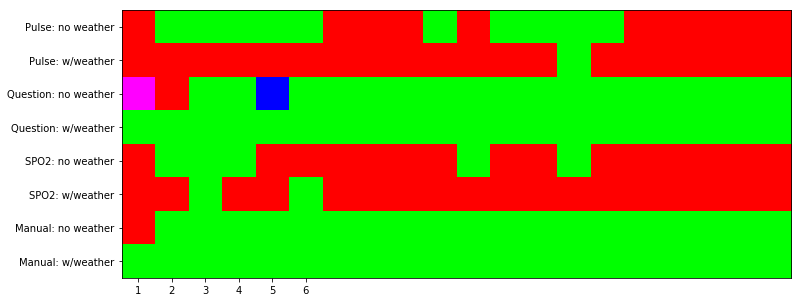

In [107]:
model_by_color = {
    'DT' : (1.0,0.0,0.0),
    'RF' : (0.0,1.0,0.0),
    'GBT' : (0.0,0.0,1.0),
    'LR' : (1.0,0.0,1.0),
}

for par in ["F1"]:
    triages_list = list(triages.keys())
    triage_matrix = np.zeros((2*len(triages_list), len(best_models_test[par][t]["X_test"]), 3))                
    y_ticks = list()
    for i in range(len(triages_list)):
        t = triages_list[i]
        print(t, best_models_test[par][t])        
        for j in range(len(best_models_test[par][t]["X_test"])):
            triage_matrix[2*i,j,:] = model_by_color[best_models_test[par][t]["Models_h"][j]]
            triage_matrix[2*i+1,j,:] = model_by_color[best_models_test[par][t]["Models_hw"][j]]
        y_ticks.append(t + ": no weather")
        y_ticks.append(t + ": w/weather")
    #print(triage_matrix)

    print(y_ticks)
    
    plt.gcf().set_size_inches(12,6)
    plt.imshow(triage_matrix)
    plt.xticks(range(0,6), range(1,7))
    plt.yticks(range(0,len(y_ticks)),y_ticks)
    plt.show()

In [108]:
cur_triage_history_only.reset_index()

,level_0,index,Triage,Features,History_days,Weather_avg_h,Model,Parameters,NumTrgSamples,NumTestSamples,...,TestAcc,Precision,Recall,F1,TP,TN,FP,FN,ImprOverMajTest,ImprOverMajTrain
0,0,497,manual_Triage,History,3,0,DT,10-None,1543,171,...,0.618414,0.724163,0.502224,0.590271,40.4,76.1,15.4,39.5,0.084523,0.115065
1,1,498,manual_Triage,History,3,0,DT,10-auto,1543,171,...,0.618414,0.724812,0.503632,0.591409,40.5,76.1,15.4,39.4,0.084523,0.115065
2,2,499,manual_Triage,History,3,0,DT,10-log2,1543,171,...,0.618414,0.724812,0.503632,0.591409,40.5,76.1,15.4,39.4,0.084523,0.115065
3,3,500,manual_Triage,History,3,0,DT,20-None,1543,171,...,0.618414,0.724163,0.502224,0.590271,40.4,76.1,15.4,39.5,0.084523,0.115065
4,4,501,manual_Triage,History,3,0,DT,20-auto,1543,171,...,0.618414,0.724812,0.503632,0.591409,40.5,76.1,15.4,39.4,0.084523,0.115065
5,5,502,manual_Triage,History,3,0,DT,20-log2,1543,171,...,0.618414,0.724812,0.503632,0.591409,40.5,76.1,15.4,39.4,0.084523,0.115065
6,6,503,manual_Triage,History,3,0,DT,5-None,1543,171,...,0.622487,0.716700,0.547676,0.618916,43.9,74.2,17.3,36.0,0.088596,0.111823
7,7,504,manual_Triage,History,3,0,DT,5-auto,1543,171,...,0.614892,0.709128,0.538502,0.609091,43.1,73.7,17.8,36.8,0.081001,0.101646
8,8,505,manual_Triage,History,3,0,DT,5-log2,1543,171,...,0.614892,0.709128,0.538502,0.609091,43.1,73.7,17.8,36.8,0.081001,0.101646
9,9,506,manual_Triage,History,3,0,DT,50-None,1543,171,...,0.618414,0.724163,0.502224,0.590271,40.4,76.1,15.4,39.5,0.084523,0.115065


In [109]:
str("AbC").lower()

'abc'

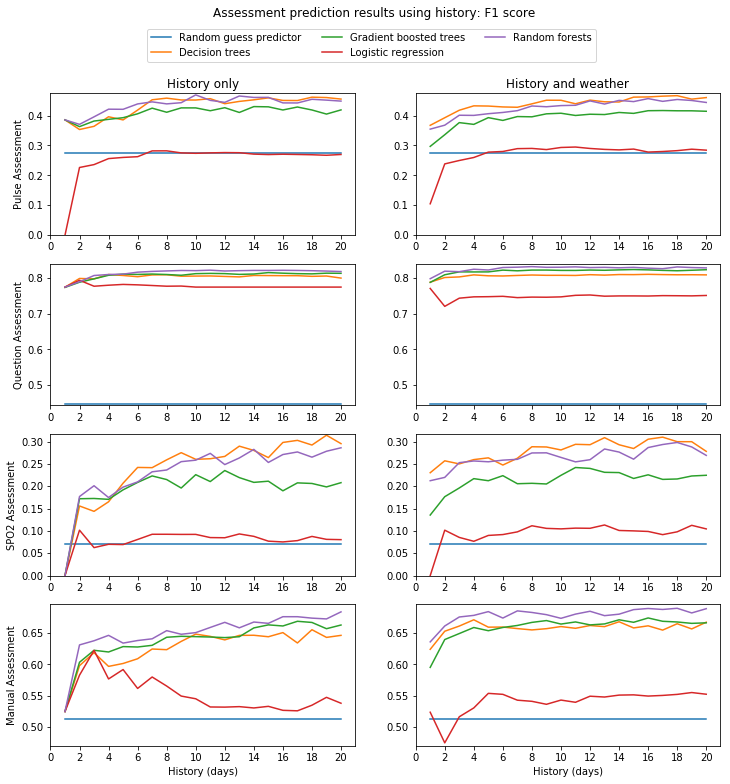

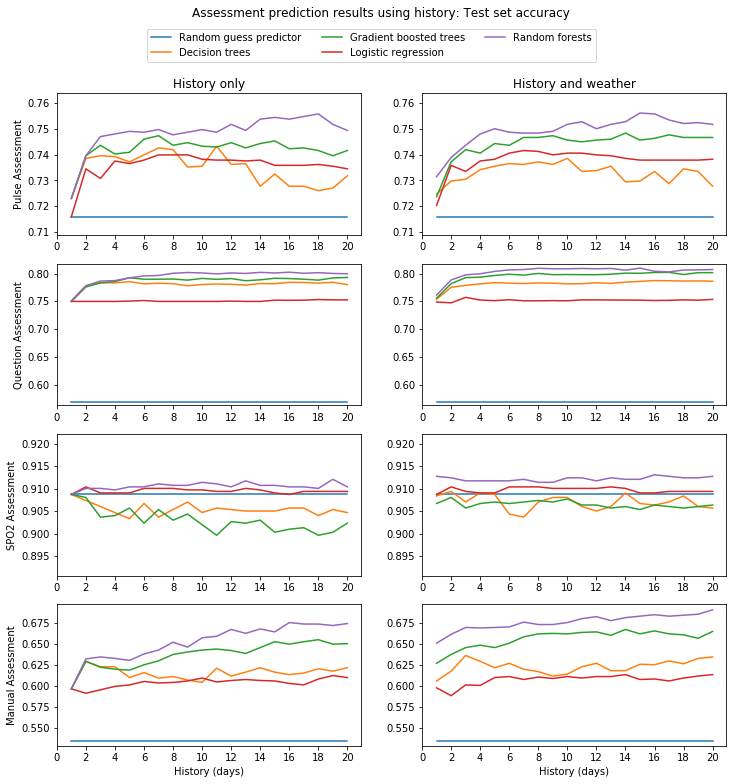

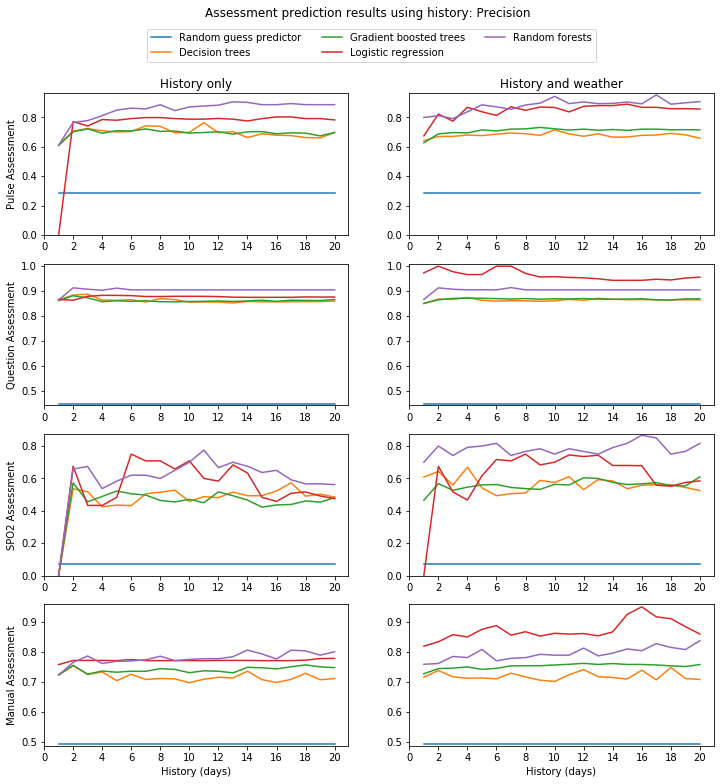

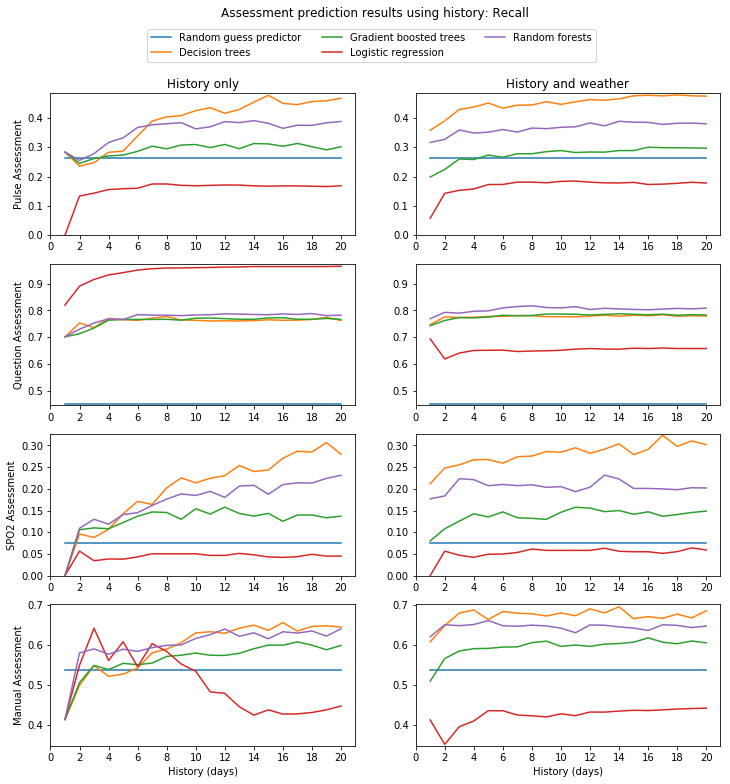

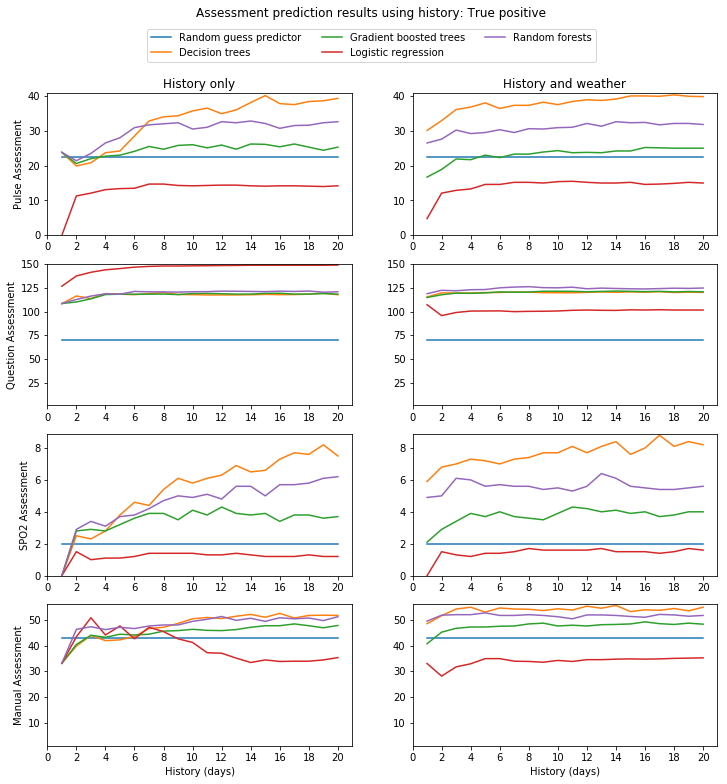

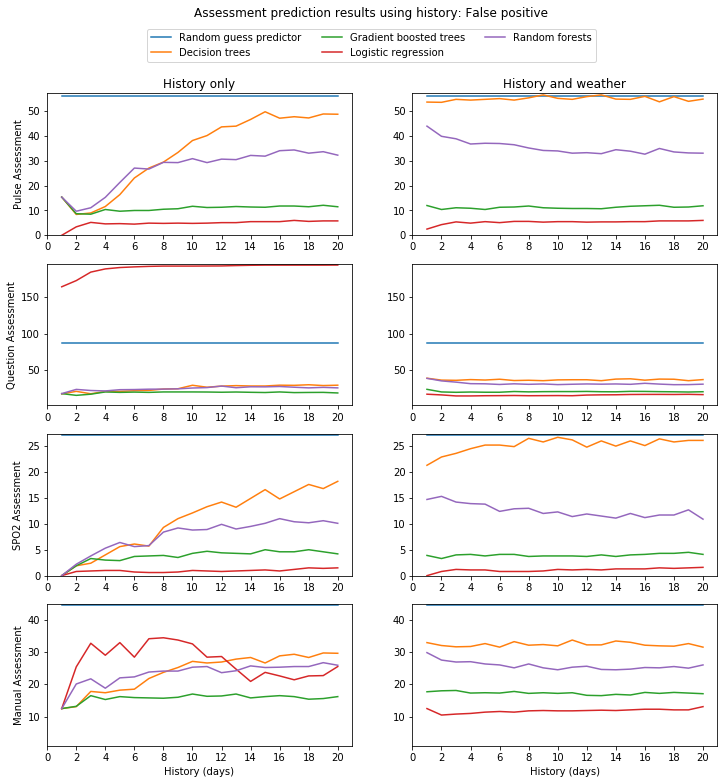

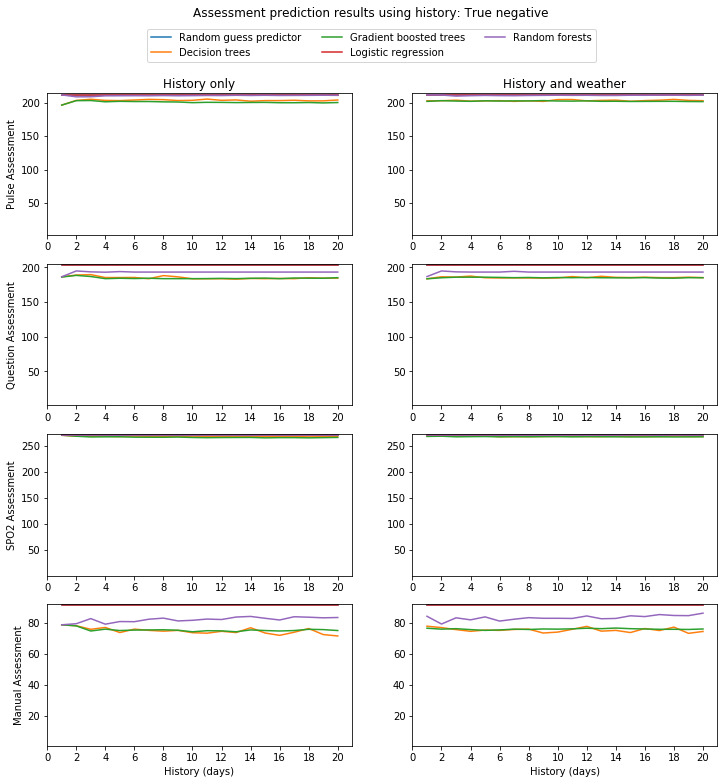

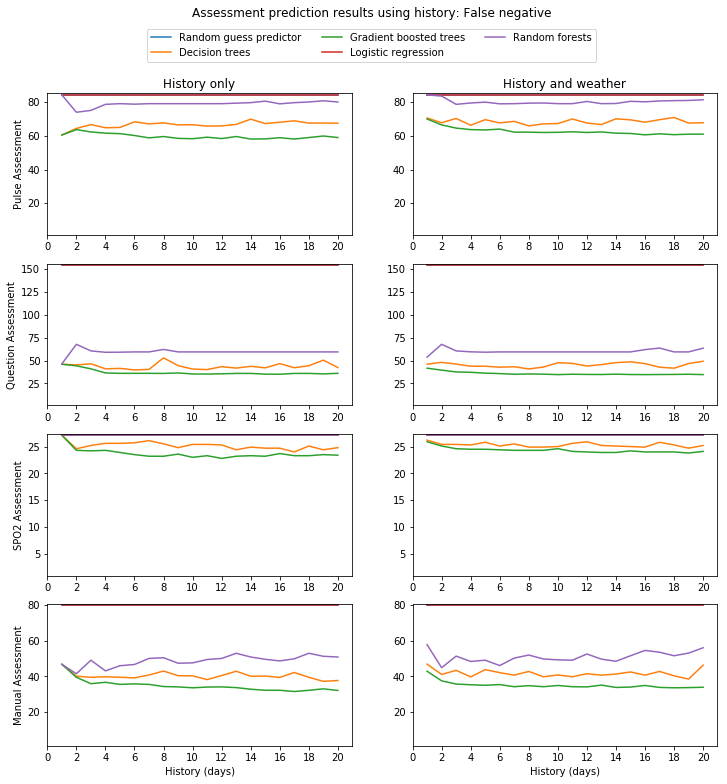

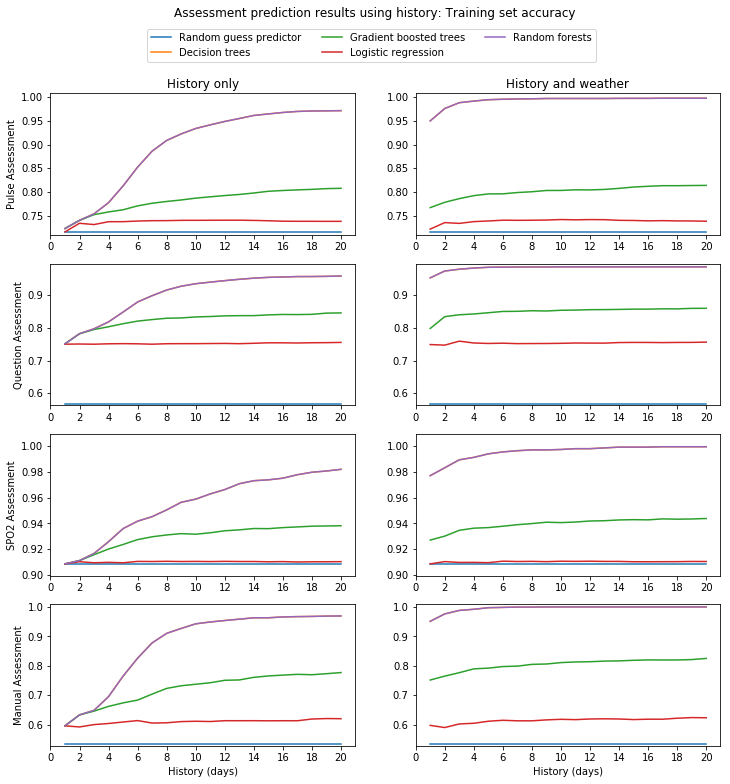

In [116]:
for parameter in readable_parameter_names.keys():
    f, ax = plt.subplots(len(triages), 2)
    f.set_size_inches(12,12)
    f.suptitle("Assessment prediction results using history: "+readable_parameter_names[parameter])

    prediction_type_list = ["History only", "History and weather"]
    triage_list = list(triages.keys())

    for i in range(len(triage_list)):
        t = triage_list[i]
        ax[i,0].set_ylabel(t + " Assessment")
        cur_triage_df = triages[t]
        cur_triage_history_only = cur_triage_df[cur_triage_df.Features=="History"]
        cur_triage_history_and_weather = cur_triage_df[cur_triage_df.Features=="Weather & History"]

        triage_by_predictor = (cur_triage_history_only, cur_triage_history_and_weather)

        min_ylim = 1
        max_ylim = 0

        for j in range(len(triage_by_predictor)):
            cur_triage_by_predictor = triage_by_predictor[j]
            f1_by_model = cur_triage_by_predictor.groupby(["History_days","Model"]).max()[parameter]
            min_ylim = np.min((min_ylim, np.min(f1_by_model)))
            max_ylim = np.max((max_ylim, np.max(f1_by_model)))
            f1_by_model_df = pd.DataFrame(f1_by_model)
            f1_by_model_df = f1_by_model_df.reset_index()
            legend_list = list()
            for m in f1_by_model_df["Model"].unique():
                legend_list.append(human_readable_model_name[m])
                cur_f1_by_model_df = f1_by_model_df[f1_by_model_df.Model==m]
                x = list()
                y = list()
                for h in sorted(cur_f1_by_model_df["History_days"].unique()):
                    x.append(h)
                    y.append(list(cur_f1_by_model_df[cur_f1_by_model_df["History_days"]==h][parameter])[0])
                ax[i,j].plot(x,y)
            if i==0 and j==0:
                f.legend(legend_list, loc='upper center',ncol=3, bbox_to_anchor=[0.43,0.88])
                
        for j in range(len(triage_by_predictor)):
            ax[i,j].set_ylim([min_ylim*0.99, max_ylim*1.01])

    for i in range(len(prediction_type_list)):
        ax[0,i].set_title(prediction_type_list[i])
        ax[-1,i].set_xlabel("History (days)")
        
    for i in range(len(ax)):
        for j in range(len(ax[i])):
            ax[i,j].set_xticks(np.arange(0, 22, 2))
        
    f.savefig(parameter+'_hist.png', bbox_inches='tight')
    plt.show(f)

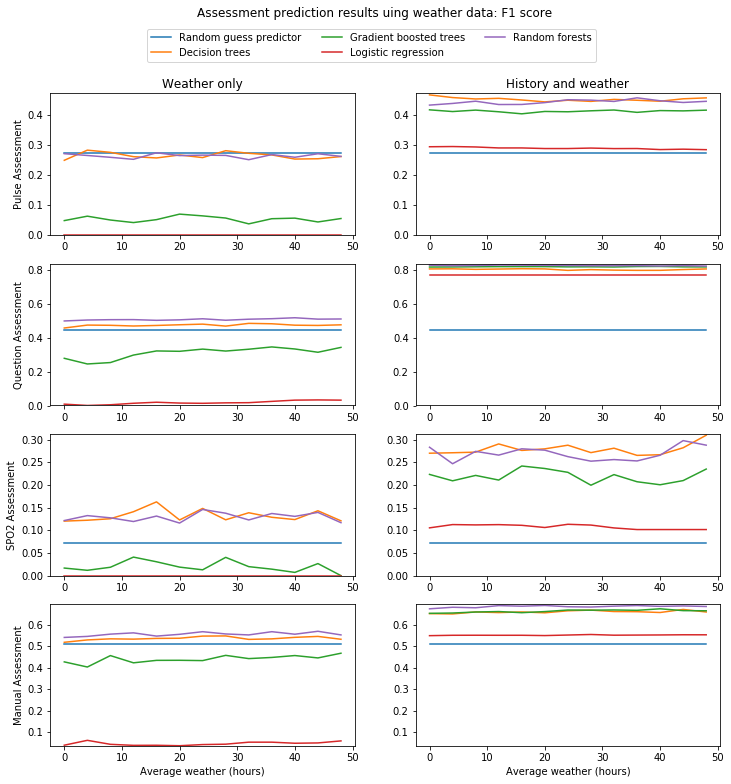

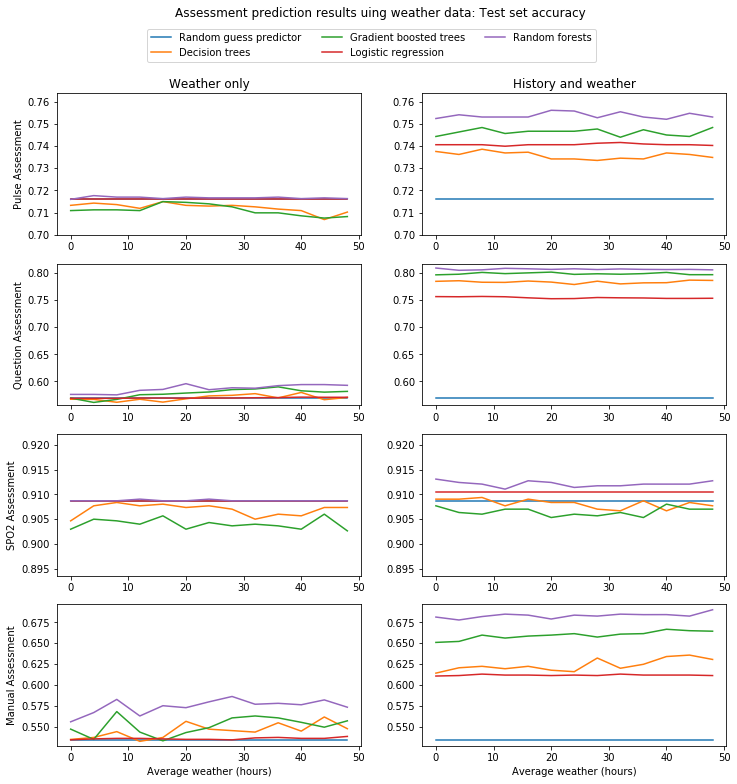

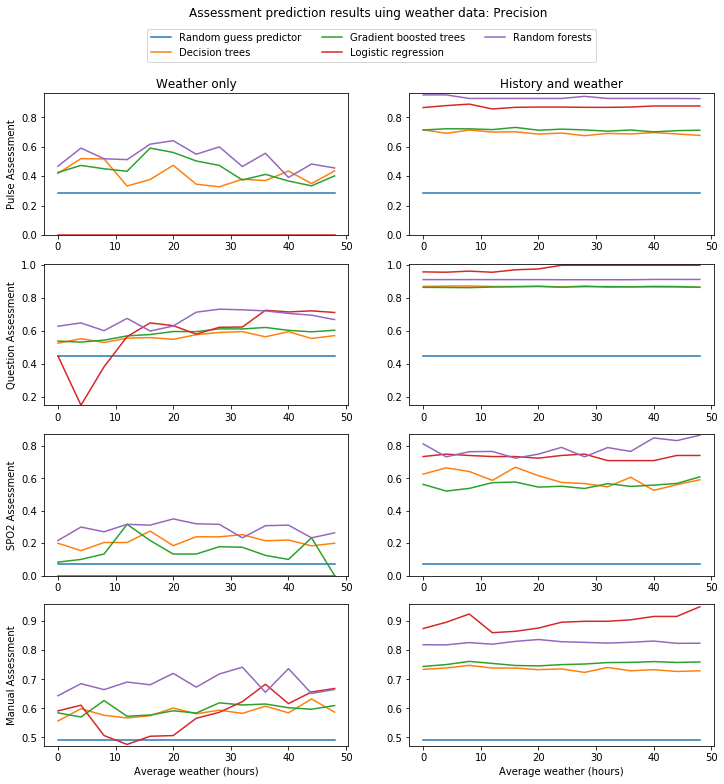

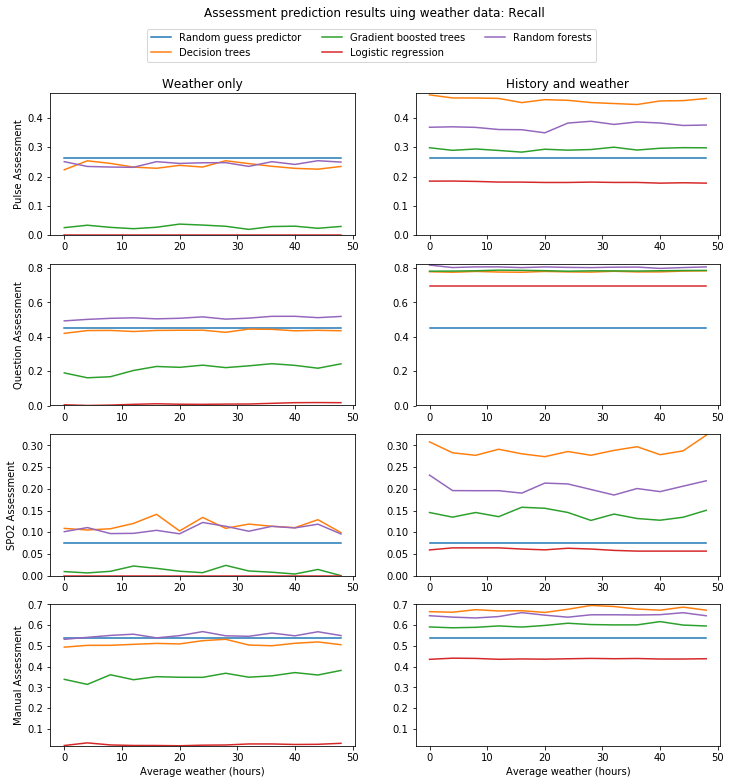

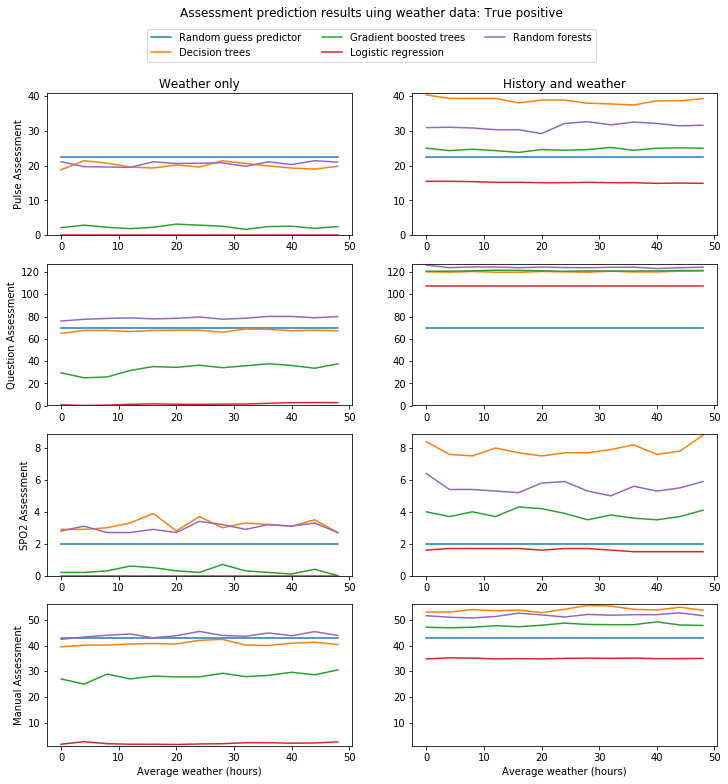

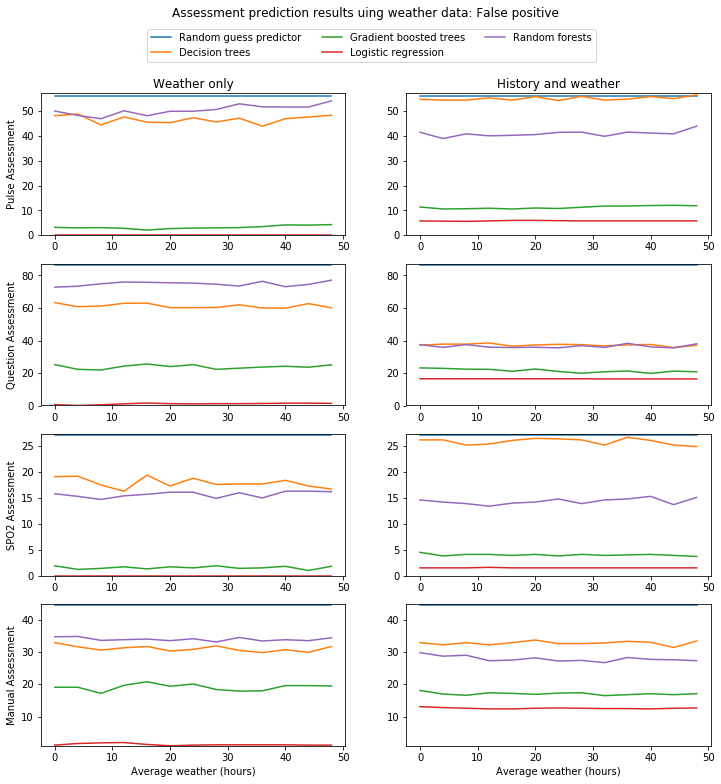

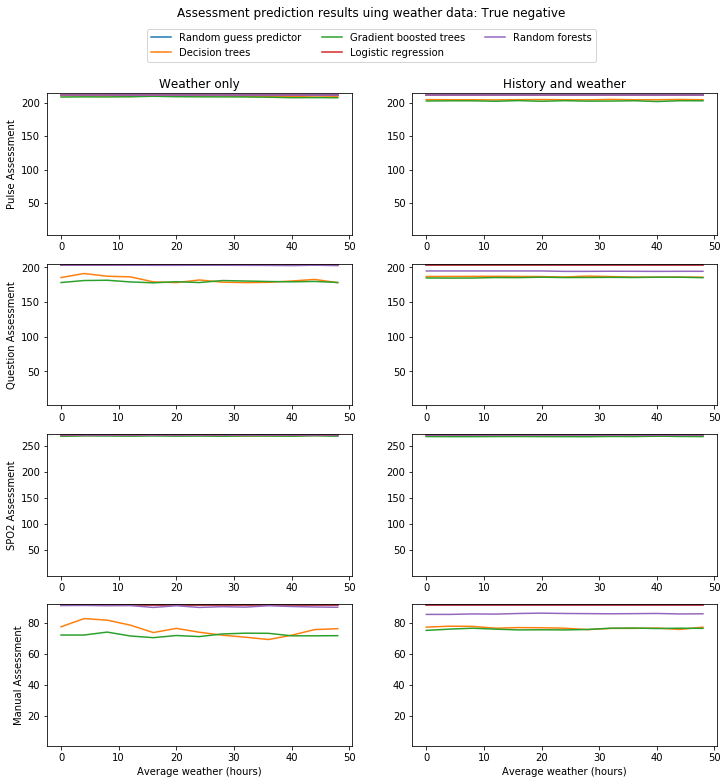

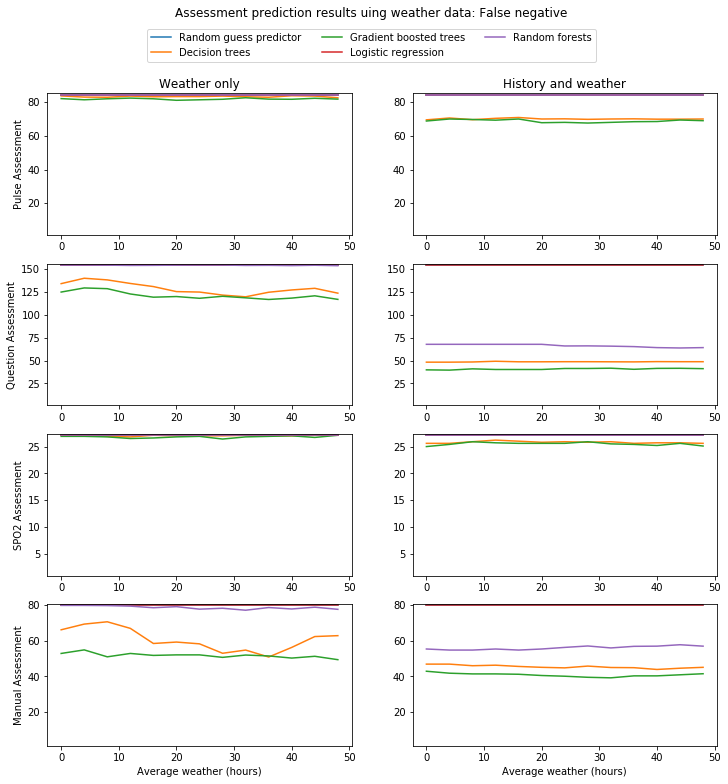

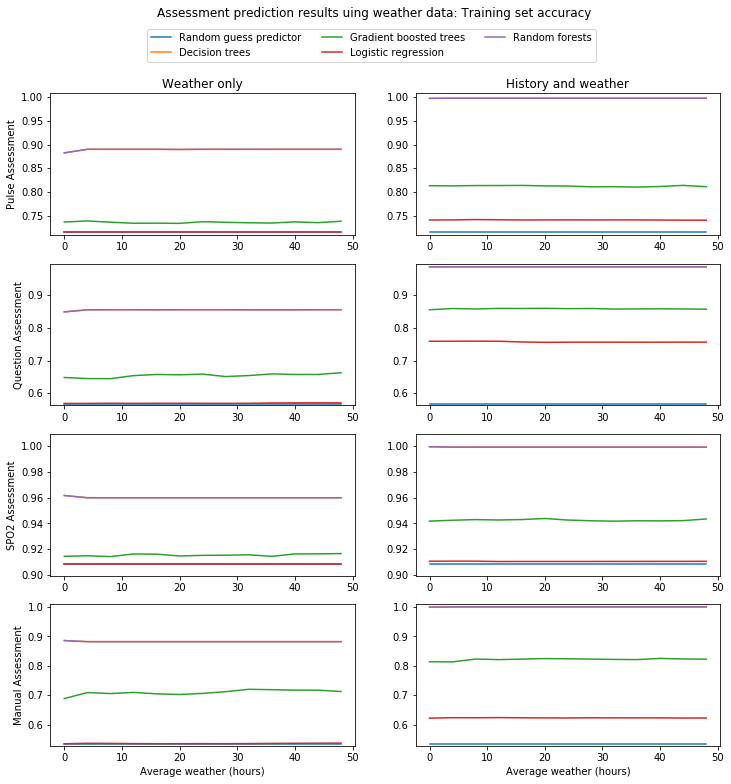

In [111]:
for parameter in readable_parameter_names.keys():
    f, ax = plt.subplots(len(triages), 2)
    f.set_size_inches(12,12)
    f.suptitle("Assessment prediction results uing weather data: "+readable_parameter_names[parameter])

    prediction_type_list = ["Weather only", "History and weather"]
    triage_list = list(triages.keys())

    for i in range(len(triage_list)):
        t = triage_list[i]
        ax[i,0].set_ylabel(t + " Assessment")
        cur_triage_df = triages[t]
        cur_triage_weather_only = cur_triage_df[cur_triage_df.Features=="Weather"]
        cur_triage_history_and_weather = cur_triage_df[cur_triage_df.Features=="Weather & History"]

        triage_by_predictor = (cur_triage_weather_only, cur_triage_history_and_weather)

        min_ylim = 1
        max_ylim = 0

        for j in range(len(triage_by_predictor)):
            cur_triage_by_predictor = triage_by_predictor[j]
            f1_by_model = cur_triage_by_predictor.groupby(["Weather_avg_h","Model"]).max()[parameter]
            min_ylim = np.min((min_ylim, np.min(f1_by_model)))
            max_ylim = np.max((max_ylim, np.max(f1_by_model)))
            f1_by_model_df = pd.DataFrame(f1_by_model)
            f1_by_model_df = f1_by_model_df.reset_index()
            legend_list = list()
            for m in f1_by_model_df["Model"].unique():
                legend_list.append(human_readable_model_name[m])
                cur_f1_by_model_df = f1_by_model_df[f1_by_model_df.Model==m]
                x = list()
                y = list()
                for h in sorted(cur_f1_by_model_df["Weather_avg_h"].unique()):
                    x.append(h)
                    y.append(list(cur_f1_by_model_df[cur_f1_by_model_df["Weather_avg_h"]==h][parameter])[0])
                ax[i,j].plot(x,y)
            if i==0 and j==0:
                f.legend(legend_list, loc='upper center',ncol=3, bbox_to_anchor=[0.43,0.88])
                
        for j in range(len(triage_by_predictor)):
            ax[i,j].set_ylim([min_ylim*0.99, max_ylim*1.01])

    for i in range(len(prediction_type_list)):
        ax[0,i].set_title(prediction_type_list[i])
        ax[-1,i].set_xlabel("Average weather (hours)")

    f.savefig(parameter+'_weather.png', bbox_inches='tight')
    plt.show(f)

In [112]:
# TODO summarize it
# TODO 

### 